# AI Assignment 8

## Task 1

1. Download the iris dataset using the link
https://www.kaggle.com/datasets/uciml/iris?select=Iris.csv
2. Construct a neural network with multiple hidden layers
3. Split the dataset into Training (70%) and Testing (30%)
4. Train the data using the constructed neural network with the
following settings:

(i) Loss function= cross entropy, optimizer= Adam, Activation in
output layer= softmax, Activation in hidden layer= sigmoid

(ii) Loss function= cross entropy, optimizer= Adam, Activation in
output layer= softmax, Activation in hidden layer= Relu

![IMG](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from torch.optim import Adam
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from torch.autograd import Variable


le = preprocessing.LabelEncoder()

In [2]:
iris = pd.read_csv("https://raw.githubusercontent.com/kurianbenoy/DataminingLab/master/Iris.csv", low_memory=False)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [4]:
df = iris.drop("Id", axis=1)

In [5]:
df['Species'] = le.fit_transform(df['Species'])

In [6]:
X = df.iloc[:, :-1]
y = df["Species"].astype(np.float32)
y.value_counts()

0.0    50
1.0    50
2.0    50
Name: Species, dtype: int64

In [7]:
X["SepalLengthCm"] = X["SepalLengthCm"].astype(np.float32)
X["SepalWidthCm"] = X["SepalWidthCm"].astype(np.float32)
X["PetalLengthCm"] = X["PetalLengthCm"].astype(np.float32)
X["PetalWidthCm"] = X["PetalWidthCm"].astype(np.float32)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
class IrisDataset(Dataset):
  def __init__(self, X_train, y_train):
    self.X_train = torch.tensor(X_train.to_numpy())
    self.y_train = Variable(torch.from_numpy(y_train.to_numpy())).long()

  def __len__(self):
    return len(self.y_train)

  def __getitem__(self, index):
      return self.X_train, self.y_train


In [13]:
training_data = IrisDataset(X_train, y_train)
validation_data = IrisDataset(X_test, y_test)

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(validation_data, batch_size=32, shuffle=True)

In [14]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([32, 105, 4])
Labels batch shape: torch.Size([32, 105])


In [53]:
class Network1(nn.Module):
    def __init__(self, input_dim):
        super(Network1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)
        self.layer2 = nn.Linear(100, 10)
        self.layer3 = nn.Linear(10, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x


In [54]:
input_dim = X_train.shape[1]
network = Network1(input_dim)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [56]:
optimizer = Adam(params=network.parameters(), lr=0.01)
loss = nn.CrossEntropyLoss()

In [58]:


def cel(y_true, y_pred):
    y_true = y_true.long().squeeze()
    return nn.CrossEntropyLoss()(y_pred, y_true)

def acc(y_true, y_pred):
    y_true = y_true.long().squeeze()
    y_pred = torch.argmax(y_pred, axis=1)
    return (y_true == y_pred).float().sum()/len(y_true)

In [59]:
for epoch in range(5):
  network = network.train()
  for train_batch in train_dataloader:
    train_X, train_y = train_batch
    train_X = train_X.to(device)
    train_y = train_y.to(device)
    print(train_X.shape)
    train_preds = network.forward(train_X)
    print("start")
    print(train_preds.shape)
    print(train_y.shape)
    print("end")
    train_loss = cel(train_y, train_preds)
    # train_accuracy = acc(train_y, train_preds)

torch.Size([32, 105, 4])
start
torch.Size([32, 105, 3])
torch.Size([32, 105])
end


RuntimeError: ignored

In [141]:
criterion = nn.CrossEntropyLoss()

output = Variable(torch.randn(10, 120).float())
target = Variable(torch.FloatTensor(10).uniform_(0, 120).long())

loss = criterion(output, target)

NameError: ignored

In [136]:
# Example of target with class indices
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
print(input, output)
output = loss(input, target)
# output.backward()
# # Example of target with class probabilities
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.randn(3, 5).softmax(dim=1)
# output = loss(input, target)
# output.backward()

tensor([[ 1.8945,  0.8105, -0.2081, -0.2974, -1.6835],
        [ 1.0878, -0.8374, -0.9056, -0.3701, -0.2595],
        [ 1.6506, -0.1301, -0.0668,  0.0720,  1.3545]], requires_grad=True) tensor(1.9428, grad_fn=<DivBackward1>)


In [137]:
output

tensor(2.0893, grad_fn=<NllLossBackward0>)

In [142]:
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

TypeError: ignored

In [143]:
from torch.autograd import Variable

criterion = nn.CrossEntropyLoss()

output = Variable(torch.randn(10, 120).float())
target = Variable(torch.FloatTensor(10).uniform_(0, 120).long())

loss = criterion(output, target)

In [144]:
loss

tensor(5.0479)

In [145]:
target

tensor([ 95,  23,  16,  41,  95, 101,  65, 109,  90,  39])

In [146]:
output

tensor([[ 1.8143,  0.9521, -0.3166,  ..., -1.0096, -0.7244, -1.0837],
        [ 1.0984,  1.1211, -0.6955,  ...,  0.4775,  0.2404,  0.5272],
        [ 0.5926,  0.5763,  1.1063,  ...,  0.7262, -0.0426,  0.0220],
        ...,
        [-1.2900,  0.3684,  0.4877,  ..., -0.1206, -1.0235, -0.8639],
        [-1.9325,  0.0120,  1.2883,  ..., -0.2284,  0.2563,  0.5699],
        [ 0.3319, -0.7479,  0.5657,  ...,  1.1491, -0.9968,  3.1824]])

## Fastai Approach with DataBlocks

In [75]:
! pip install -Uqq fastai

     |████████████████████████████████| 188 kB 17.1 MB/s 
     |████████████████████████████████| 60 kB 5.5 MB/s 


In [79]:
from fastai.text.all import *
from fastai.imports import *

## Blogpost on Pytorch Iris

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')


In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=2)


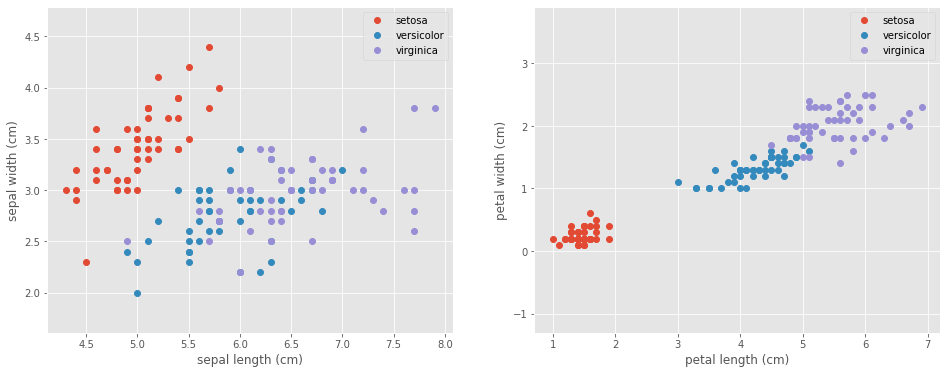

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


In [23]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable


In [24]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x


In [25]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model


Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

In [26]:
import tqdm

EPOCHS  = 100
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

X_train, y_train, X_test, y_test

(tensor([[ 3.1100e-01, -1.0528e+00,  1.0469e+00,  2.6414e-01],
         [-7.7951e-01,  7.8881e-01, -1.3402e+00, -1.3154e+00],
         [ 1.0380e+00,  9.8217e-02,  3.6490e-01,  2.6414e-01],
         [-9.0068e-01,  1.0190e+00, -1.3402e+00, -1.3154e+00],
         [-7.7951e-01,  1.0190e+00, -1.2834e+00, -1.3154e+00],
         [-4.1601e-01,  1.0190e+00, -1.3971e+00, -1.3154e+00],
         [-1.1430e+00, -1.2830e+00,  4.2173e-01,  6.5904e-01],
         [ 4.3217e-01,  7.8881e-01,  9.3327e-01,  1.4488e+00],
         [ 2.4920e+00,  1.7096e+00,  1.5016e+00,  1.0539e+00],
         [-5.3718e-01,  7.8881e-01, -1.1697e+00, -1.3154e+00],
         [ 1.0380e+00,  9.8217e-02,  1.0469e+00,  1.5805e+00],
         [ 5.5333e-01,  7.8881e-01,  1.0469e+00,  1.5805e+00],
         [ 2.1285e+00, -1.3198e-01,  1.6153e+00,  1.1856e+00],
         [ 1.8983e-01, -1.9736e+00,  7.0592e-01,  3.9577e-01],
         [-1.8700e+00, -1.3198e-01, -1.5107e+00, -1.4471e+00],
         [-1.2642e+00,  9.8217e-02, -1.2266e+00, -1.315

In [28]:
y_train.shape

torch.Size([105])

In [29]:
loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))


In [33]:
loss_list

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
accuracy_list

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 403.06it/s]


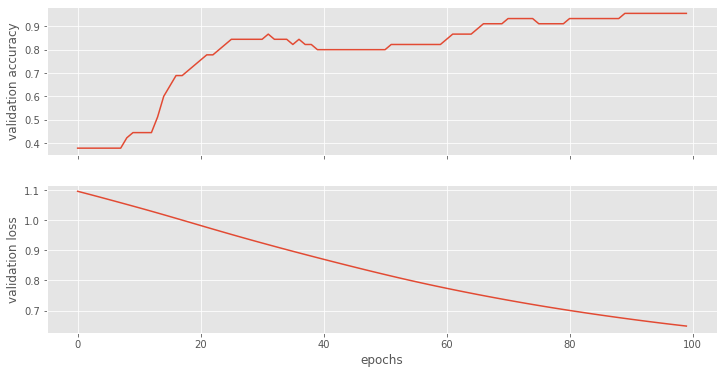

In [36]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");


## References

1. https://janakiev.com/blog/pytorch-iris/
2. Deep Learning For Coders with fastai & Pytorch - Chapter 4

## Task 2

Construct a medical diagnosis agent to identify the stages of Cirrhosis
Disease.

(i) Download the dataset from [Kaggle prediction dataset](https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset)

(ii) Construct a neural network using multiple hidden layers

(iii) Convert the categorical attributes to numerical and drop the
unnecessary attributes.

(iv) Fill the missing values if any or drop the entire record.

(v) Split the dataset into Training (70%) and Testing (30%)

(vi) Train the data using the constructed neural network with the
following settings: Loss function= cross entropy, optimizer= Adam,
Activation in output layer= softmax, Activation in hidden layer= Relu

(vii)Compute the accuracy of the model.

In [40]:
med = pd.read_csv("https://raw.githubusercontent.com/kurianbenoy/DataminingLab/master/cirrhosis.csv", low_memory=False, index_col='ID')
med.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [41]:
med.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00
Platelets,407.0,257.024570,98.325585,62.00,188.5000,251.00,318.00,721.00


In [42]:
def advanced_describe(df):
    # get descriptive stats for dataframe for 'all' column dtypes
    desc = df.describe(include='all').T
    desc.drop(['top', 'freq', 'unique'], axis=1, inplace=True)
    
    # update column counts (df.describe() returns NaN for non-numeric cols)
    counts = pd.Series({ col: df[col].count() for col in df.columns })
    desc.update(counts.to_frame('count'))
    
    # add missing count/%
    missings = df.isnull().sum()
    desc = pd.concat([desc, missings.to_frame('missing')], axis=1)
    desc['missing%'] = (desc['missing'] / len(desc)).round(2)

    # add unique counts/%
    uniques = pd.Series({ col: len(df[col].unique()) for col in df.columns })
    desc = pd.concat([desc, uniques.to_frame('unique')], axis=1)
    desc['unique%'] = (desc['unique'] / len(desc)).round(2)
    
    unique_vals = pd.Series({ col: df[col].unique() for col in df.columns if len(df[col].unique()) < 20 })
    desc = pd.concat([desc, unique_vals.to_frame('unique_values')], axis=1)
    
    # add col dtype
    dtypes = pd.Series({ col: df[col].dtype for col in df.columns })
    desc = pd.concat([desc, dtypes.to_frame('dtype')], axis=1)
    
    return desc


In [43]:
advanced_describe(med)

,count,mean,std,min,25%,50%,75%,max,missing,missing%,unique,unique%,unique_values,dtype
N_Days,418,1917.782297,1104.672992,41.0,1092.75,1730.0,2613.5,4795.0,0,0.00,399,21.00,NaN,int64
Status,418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,3,0.16,"[D, C, CL]",object
Drug,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,5.58,3,0.16,"[D-penicillamine, Placebo, nan]",object
Age,418,18533.351675,3815.845055,9598.0,15644.5,18628.0,21272.5,28650.0,0,0.00,344,18.11,NaN,int64
Sex,418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,2,0.11,"[F, M]",object
Ascites,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,5.58,3,0.16,"[Y, N, nan]",object
Hepatomegaly,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,5.58,3,0.16,"[Y, N, nan]",object
Spiders,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,5.58,3,0.16,"[Y, N, nan]",object
Edema,418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,3,0.16,"[Y, N, S]",object
Bilirubin,418,3.220813,4.407506,0.3,0.8,1.4,3.4,28.0,0,0.00,98,5.16,NaN,float64


In [44]:
med.shape

(418, 19)

In [45]:
med.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [50]:
# From solution: https://stackoverflow.com/questions/39128856/python-drop-row-if-two-columns-are-nan
med.dropna(subset=['Drug','Ascites', 'Hepatomegaly', 'Spiders','Cholesterol','Platelets','Tryglicerides', 'Copper'], how='any', inplace=True)

In [51]:
med.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [53]:
# Cleaned dataset
med.shape

(276, 19)

In [54]:
med.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [55]:
med.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [56]:
med['Status'] = le.fit_transform(med['Status'])
med['Drug'] = le.fit_transform(med['Drug'])
med['Sex'] = le.fit_transform(med['Sex'])
med['Ascites'] = le.fit_transform(med['Ascites'])
med['Hepatomegaly'] = le.fit_transform(med['Hepatomegaly'])
med['Spiders'] = le.fit_transform(med['Spiders'])
med['Edema'] = le.fit_transform(med['Edema'])


In [63]:
med["Bilirubin"] = med["Bilirubin"].astype(np.float32)
med["Cholesterol"] = med["Cholesterol"].astype(np.float32)
med["Albumin"] = med["Albumin"].astype(np.float32)
med["Copper"] = med["Copper"].astype(np.float32)
med["Alk_Phos"] = med["Alk_Phos"].astype(np.float32)
med["SGOT"] = med["SGOT"].astype(np.float32)
med["Tryglicerides"] = med["Tryglicerides"].astype(np.float32)
med["Platelets"] = med["Platelets"].astype(np.float32)
med["Prothrombin"] = med["Prothrombin"].astype(np.float32)
med["Stage"] = med["Stage"].astype(np.float32)

In [64]:
med.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.000000,137.949997,172.0,190.0,12.2,4.0
2,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.799805,113.519997,88.0,221.0,10.6,3.0
3,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.000000,96.099998,55.0,151.0,12.0,4.0
4,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.799805,60.630001,92.0,183.0,10.3,4.0
5,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.000000,113.150002,72.0,136.0,10.9,3.0


In [65]:
med.dtypes

N_Days             int64
Status             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Edema              int64
Bilirubin        float32
Cholesterol      float32
Albumin          float32
Copper           float32
Alk_Phos         float32
SGOT             float32
Tryglicerides    float32
Platelets        float32
Prothrombin      float32
Stage            float32
dtype: object